In [3]:
import csv

import matplotlib.pyplot as plt

import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import abline_plot

import numpy as np

In [5]:
key_title = 'title'
key_platform = 'platform'
key_ign_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'
key_critic_score = 'Critic_Score'
key_critic_count = 'Critic_Count'
key_user_score = 'User_Score'
key_user_count = 'User_Count'

keys = [key_title, key_platform, key_ign_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global]



In [26]:
def beautify_dict(data):
    need_removing = []
    
    for i in range(0, len(data)):
        if data[i][key_critic_count] == '' or data[i][key_user_count] == '':
            need_removing += [i]
            continue

        data[i][key_ign_score] = float(data[i][key_ign_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])
        data[i][key_critic_count] = int(data[i][key_critic_count])
        data[i][key_critic_score] = float(data[i][key_critic_score]) / 100
        data[i][key_user_count] = int(data[i][key_user_count])
        data[i][key_user_score] = float(data[i][key_user_score])
        
    return [row for row in data if data[i][key_critic_count] != '' or data[i][key_user_count] != '']

fin = open('data/ratings_our_data.csv', 'r')
r_data = csv.DictReader(fin)

r_data = [row for row in r_data]

r_data = beautify_dict(r_data)
    
print(r_data[0])

OrderedDict([('title', 'LittleBigPlanet PS Vita'), ('platform', 'PlayStation Vita'), ('score', 9.0), ('release_year', 2012), ('release_month', 9), ('release_day', 12), ('Rank', 1298), ('Genre', 'Platform'), ('Publisher', 'Sony Computer Entertainment'), ('NA_Sales', 0.4), ('EU_Sales', 0.72), ('JP_Sales', 0.02), ('Other_Sales', 0.33), ('Global_Sales', 1.47), ('Critic_Score', 0.88), ('Critic_Count', 71), ('User_Score', 8.6), ('User_Count', 348), ('release_quarter', 'Q3')])


## Stability tests for different noises for each console

In [68]:
def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][key_ign_score] = float(data[i][key_ign_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])

def get_beautiful_dict(file_name):    
    fin = open(file_name, 'r')
    file_data = csv.DictReader(fin)

    data = [row for row in file_data]      
    beautify_dict(data)
    return data

data = get_beautiful_dict('data/our_data.csv')
data_xbox = get_beautiful_dict('data/our_data_Xbox.csv')
data_playstation = get_beautiful_dict('data/our_data_PlayStation.csv')
data_nintendo = get_beautiful_dict('data/our_data_Nintendo.csv')
data_pc = get_beautiful_dict('data/our_data_PC.csv')

years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013, 2014, 2015, 2016]

def calc_LinR_model_Cat(data): 
    df1 = pd.DataFrame(data[0], columns=our_keys)
    df2 = pd.DataFrame(data[1], columns=our_keys)
    df3 = pd.DataFrame(data[2], columns=our_keys)
    df4 = pd.DataFrame(data[3], columns=our_keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame

    fit1 = smf.ols(formula=key_global + ' ~ ' + key_ign_score + ' + ' + 'C(' + key_genre + ')', data=df1).fit()
    fit2 = smf.ols(formula=key_global + ' ~ ' + key_ign_score + ' + ' + 'C(' + key_genre + ')', data=df2).fit()
    fit3 = smf.ols(formula=key_global + ' ~ ' + key_ign_score + ' + ' + 'C(' + key_genre + ')', data=df3).fit()
    fit4 = smf.ols(formula=key_global + ' ~ ' + key_ign_score + ' + ' + 'C(' + key_genre + ')', data=df4).fit()
    
    
    return fit1, fit2, fit3, fit4
#     return model

def calc_LinR_model_Cat_in_years(data):    
    df = pd.DataFrame(data, columns=keys)
    # Put the target (Global Sales -- Global_Sales) in another DataFrame
    fit = smf.ols(formula=key_global + ' ~ ' + key_ign_score + ' + ' + 'C(' + key_genre + ')', data=df).fit()
    #fit = smf.ols(formula=key_global + ' ~ ' + 'C(' + key_genre + ')', data=df).fit()

    return fit

# Gets the games of all the data, splits it in quarters.
def get_games_of_year_in_quarters(begin_year, end_year, data):  
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    for row in data:
        if int(row[key_release_y]) <= end_year and int(row[key_release_y]) >= begin_year:
            if row[key_release_q] == 'Q1':
                quarter1.append(row)
            elif row[key_release_q] == 'Q2':
                quarter2.append(row)
            elif row[key_release_q] == 'Q3':
                quarter3.append(row)
            elif row[key_release_q] == 'Q4':
                quarter4.append(row)
    return quarter1, quarter2, quarter3, quarter4, quarter1 + quarter2 + quarter3 + quarter4 

# Gets the hits for the actual data representing the big hits.
def get_hits_in_quarters(data):
    q = 1
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    
    for item in data:
        if q == 1:
            quarter1.append(item)
            q += 1
        elif q == 2:
            quarter2.append(item)
            q += 1
        elif q == 3:
            quarter3.append(item)
            q += 1
        elif q == 4:
            quarter4.append(item)
            q = 1
        
    return quarter1, quarter2, quarter3, quarter4

def get_accuracy(model_params, big_hit, top_size):
    if len(model_params.params) - 1 < top_size:
        top = model_params.params[:-1].nlargest(len(model_params.params) - 1).keys().tolist()
    else:
        top = model_params.params[:-1].nlargest(top_size).keys().tolist()
    
    res = 0
    
    for i in range(len(top)):
        item = top[i][11:-1]
        if item in 'Intercept':
            item = 'Action'
        if item in big_hit:
            res = (len(top)-i) / len(top)
            return res
    return res

def lerp(a, b, v):
    #return (b - a) * v + a #this is faster but not numerically stable with a large difference between a and b
    return a * (1 - v) + b * v

def percentile(values, alpha):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]
    
    s = sorted(values)
    l = len(values) - 1
    
    idx_start = int(l * alpha)
    idx_end = idx_start + 1
    
    a = s[idx_start]
    b = s[idx_end]
    
    # linearly interpolate between the two values
    p_start = idx_start / l
    p_end = idx_end / l
    return lerp(a, b, (alpha - p_start) / (p_end - p_start))

def get_stability(real_model, noisy_model, top_size):
    stability = 0
    
    if len(real_model.params) - 1 < top_size:
        r_top = real_model.params[:-1].nlargest(len(real_model.params) - 1).keys().tolist()
        n_top = noisy_model.params[:-1].nlargest(len(noisy_model.params) - 1).keys().tolist()
    else:
        r_top = real_model.params[:-1].nlargest(top_size).keys().tolist()
        n_top = noisy_model.params[:-1].nlargest(top_size).keys().tolist()
    
    for i in range(len(r_top)):
        if r_top[i] == n_top[i]:
            stability += 1 / top_size
    
    return stability

def plot_stability_per_noise(data, top_size, key, year_min, year_max, noise_min, noise_max, noise_steps=10, times=10):   
    noise_range = np.linspace(noise_min, noise_max, noise_steps)
    stabilities = [[0.0 for _ in range(times)] for noise in noise_range]
    
    for y in range(year_min, year_max + 1):
        q1, q2, q3, q4, year_games = get_games_of_year_in_quarters(y - 2, y - 1, data)

        if len(year_games) > 0:
            real_model = calc_LinR_model_Cat_in_years(year_games)
            
            for i, noise in enumerate(noise_range):
                for j in range(times):
                    cur_games = [dict(game) for game in year_games]            
                    
                    for k in range(len(cur_games)):
                        cur_games[k][key] += np.random.normal(0, noise)
                    
                    n_model = calc_LinR_model_Cat_in_years(cur_games)
                    stabilities[i][j] += get_stability(real_model, n_model, top_size) / (year_max - year_min + 1)

    avgs = [percentile(s, 0.5) for s in stabilities]
    low = [percentile(s, 0.025) for s in stabilities]
    high = [percentile(s, 0.975) for s in stabilities]
    
    plt.plot(noise_range, avgs, label="Average stability")
    plt.plot(noise_range, low, label="Lower bound stability", alpha=0.5)
    plt.plot(noise_range, high, label="Higher bound stability", alpha=0.5)
    plt.legend()
    plt.xlabel("Noise")
    plt.ylabel("Stability")
    plt.title("Stability over all years per noise level with 95% confidence interval")
    plt.show()
    

quarter_hits_xbox = get_hits_in_quarters(big_hits_xbox)
quarter_hits_playstation = get_hits_in_quarters(big_hits_playstation)
quarter_hits_nintendo = get_hits_in_quarters(big_hits_nintendo)
quarter_hits_pc = get_hits_in_quarters(big_hits_pc)

top_size = 3
noise_min = 0.01
noise_max = 10.0
noise_max2 = 1.0
noise_steps = 40
times = 20
year_min = 2004
year_max = 2014

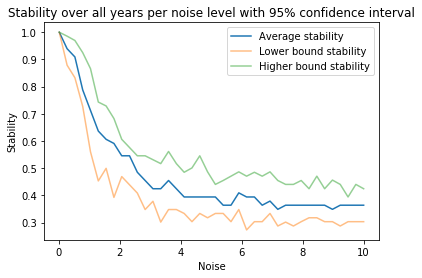

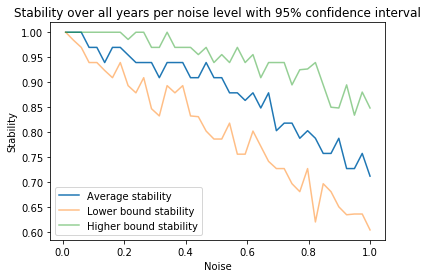

In [69]:
plot_stability_per_noise(data_xbox, top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max, noise_steps, times)
plot_stability_per_noise(data_xbox, top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max2, noise_steps, times)

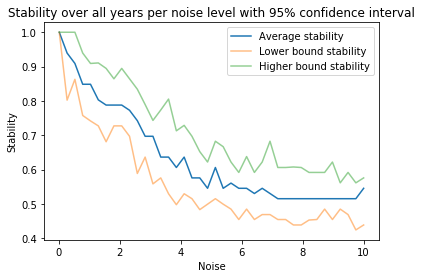

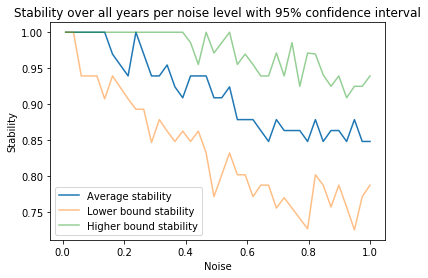

In [70]:
plot_stability_per_noise(data_nintendo, top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max, noise_steps, times)
plot_stability_per_noise(data_nintendo, top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max2, noise_steps, times)

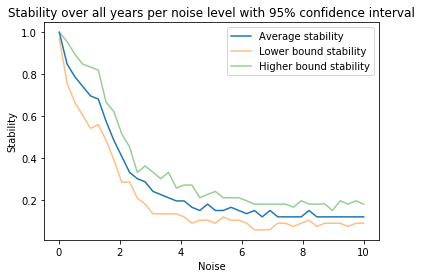

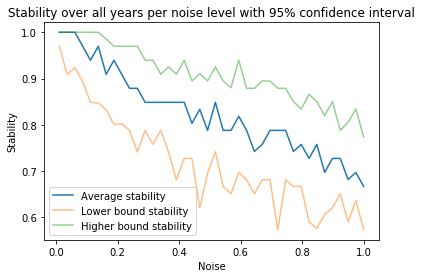

In [71]:
plot_stability_per_noise(data_playstation , top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max, noise_steps, times)
plot_stability_per_noise(data_playstation , top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max2, noise_steps, times)

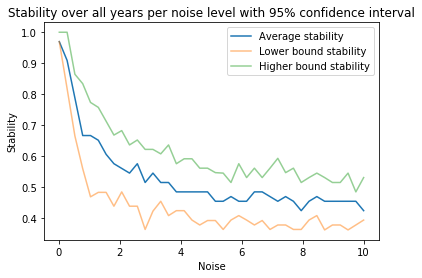

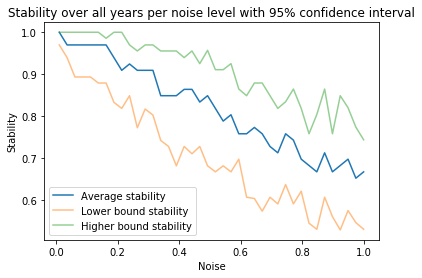

In [72]:
plot_stability_per_noise(data_pc , top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max, noise_steps, times)
plot_stability_per_noise(data_pc , top_size,
                        key_ign_score, year_min, year_max, noise_min, noise_max2, noise_steps, times)